Arjunaa Seshadri - Capabl Internship
NYC Taxi Trip Duration Calculator

1. Importing the neccessary libraries

In [45]:

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import warnings; warnings.simplefilter('ignore')



#ImportingTheNecessaryPackages


In [46]:

df = pd.read_csv('Train.csv')


Exploratory Data Analysis and Feature Engineering

In [47]:
#Structure of our Dataset
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [48]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [49]:
#Querying to find the number of missing values in each column
#There are no missing values in the dataset as seen with .info()
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Converting the datetime objects to datetime format

Arranging the trip details i.e Day, Hour, Month

In [50]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df['pickday']=df['pickup_datetime'].dt.day_name()
df['ddrop']=df['dropoff_datetime'].dt.day_name()
df['hpick']=df['pickup_datetime'].dt.hour
df['drophour']=df['dropoff_datetime'].dt.hour
df['pmonth']=df['pickup_datetime'].dt.month
df['dmonth']=df['dropoff_datetime'].dt.month




df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickday             1458644 non-null  object        
 12  ddrop               1458644 non-null  object        
 13  hpick       

<Axes: ylabel='trip_duration'>

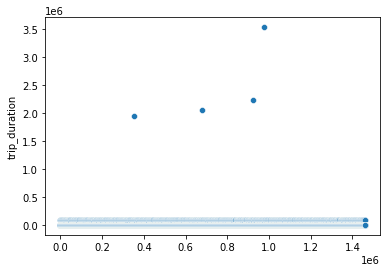

In [51]:
#Trip Duration Scatter Graph
#Some trips take less time to complete while some take more, depending our other features
df['trip_duration'].sort_values(ascending=False)
sns.scatterplot(df['trip_duration'])

In [52]:
df.passenger_count.value_counts()


passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64

As we can see, the number of trips with 7,9,8 or 0 passengers is very different compared to the other trips with different number of passengers, we shall remove the mentioned rows to maintain the performance of our model.

In [53]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<7]

df.passenger_count.value_counts()


passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: count, dtype: int64

No of Trips averaged over a day, a month and an hour

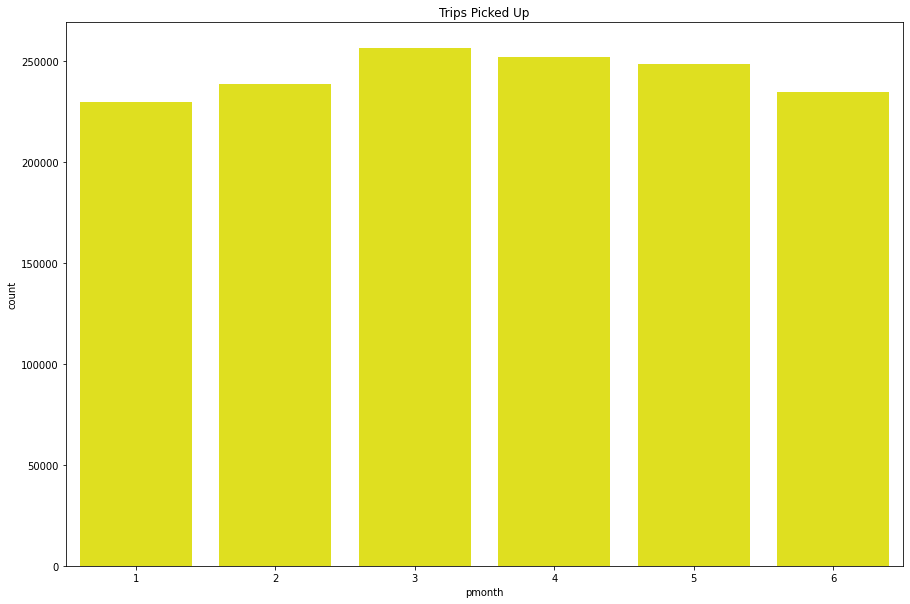

In [54]:
#Trips per month
figure, ax1 = plt.subplots(ncols=1,figsize=(15,10))
plt.title('Trips Picked Up')
ax=sns.countplot(x="pmonth",data=df,ax=ax1,color='yellow')


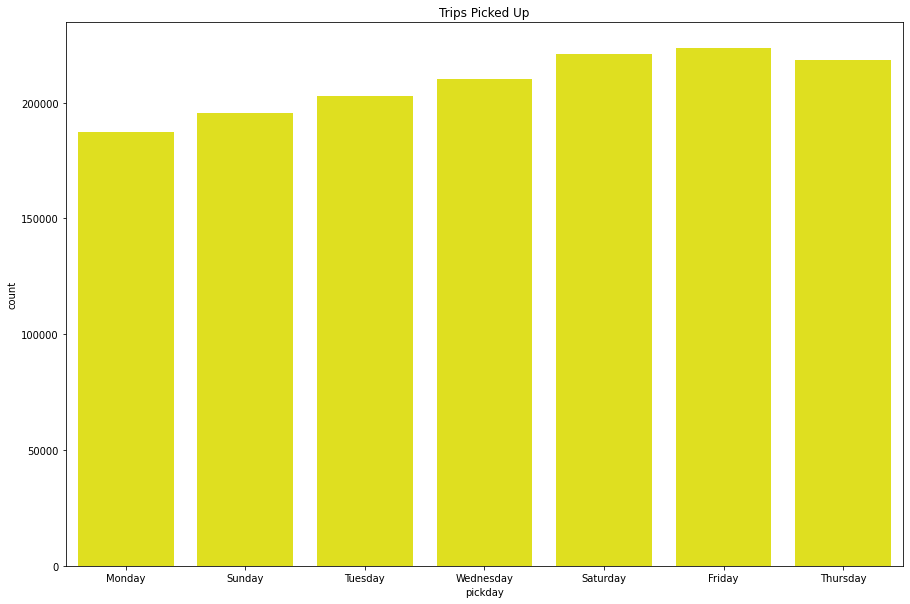

In [55]:
#Trips per Day
figure, ax2 = plt.subplots(ncols=1,figsize=(15,10))
plt.title('Trips Picked Up')
ax=sns.countplot(x="pickday",data=df,ax=ax2,color='yellow')

<Axes: title={'center': 'Trips picked / hour'}, xlabel='hpick', ylabel='trip_duration'>

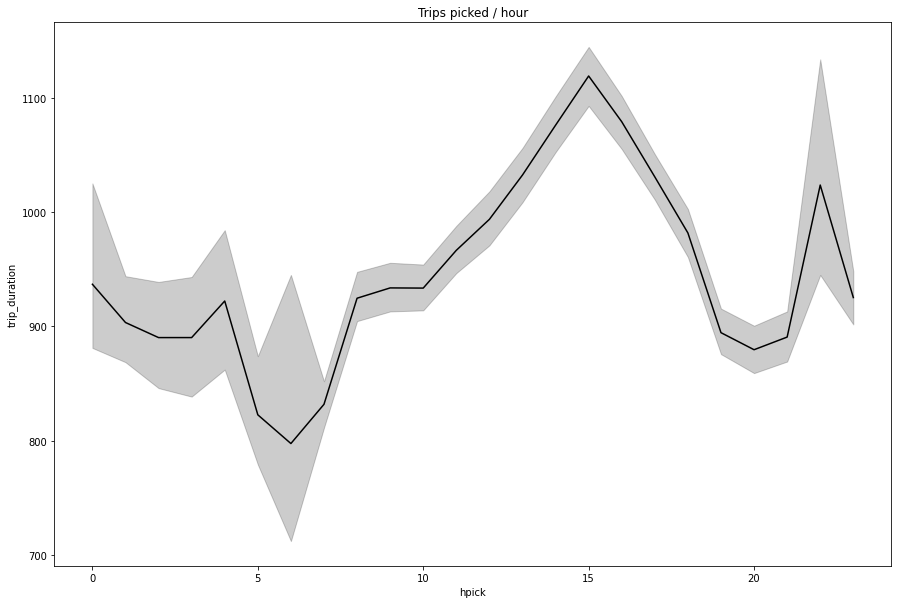

In [56]:
#TripDuration per hour
figure, ax3 = plt.subplots(ncols=1,figsize=(15,10))
plt.title('Trips picked / hour')
sns.lineplot(x='hpick',y='trip_duration',data=df,ax=ax3,color='black')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458579 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458579 non-null  object        
 1   vendor_id           1458579 non-null  int64         
 2   pickup_datetime     1458579 non-null  datetime64[ns]
 3   dropoff_datetime    1458579 non-null  datetime64[ns]
 4   passenger_count     1458579 non-null  int64         
 5   pickup_longitude    1458579 non-null  float64       
 6   pickup_latitude     1458579 non-null  float64       
 7   dropoff_longitude   1458579 non-null  float64       
 8   dropoff_latitude    1458579 non-null  float64       
 9   store_and_fwd_flag  1458579 non-null  object        
 10  trip_duration       1458579 non-null  int64         
 11  pickday             1458579 non-null  object        
 12  ddrop               1458579 non-null  object        
 13  hpick            

Distance travelled per month, a day and an hour



We have to engineer a feature 'distance' using the coordinates given to us in the dataset.

In [58]:
from math import radians, sin, cos, sqrt, atan2

def distance_calc(lati1, long1, lati2, long2):
    # Degree to Radian Conversion
    lati1, long1, lati2, long2 = map(radians, [lati1, long1, lati2, long2])

    # We know that the Radius of the Earth is 6371 in km
    R = 6371.0

    
    dlon = long2 - long1
    dlat = lati2 - lati1
    #Applying the Haversine Trigonometeric Equations to create the metrics and calculate the distance
    a = sin(dlat / 2)**2 + cos(lati1) * cos(lati2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance


df['distance'] = df.apply(lambda row: distance_calc(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458579 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458579 non-null  object        
 1   vendor_id           1458579 non-null  int64         
 2   pickup_datetime     1458579 non-null  datetime64[ns]
 3   dropoff_datetime    1458579 non-null  datetime64[ns]
 4   passenger_count     1458579 non-null  int64         
 5   pickup_longitude    1458579 non-null  float64       
 6   pickup_latitude     1458579 non-null  float64       
 7   dropoff_longitude   1458579 non-null  float64       
 8   dropoff_latitude    1458579 non-null  float64       
 9   store_and_fwd_flag  1458579 non-null  object        
 10  trip_duration       1458579 non-null  int64         
 11  pickday             1458579 non-null  object        
 12  ddrop               1458579 non-null  object        
 13  hpick            

<Axes: xlabel='pmonth', ylabel='distance'>

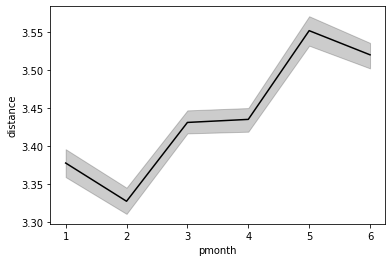

In [60]:
#distance per month

sns.lineplot(x='pmonth',y='distance',data=df,color='black')

<Axes: xlabel='pickday', ylabel='distance'>

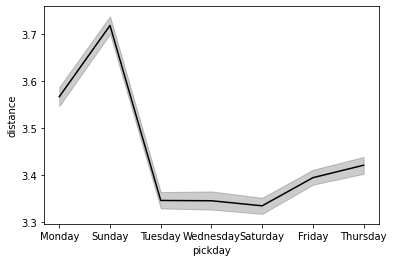

In [61]:
#distance per day
sns.lineplot(x='pickday',y='distance',data=df,color='black')

We can see that the distance travelled is at its peak on Mondays and Sundays and starts to drop off during the weekdaysa.


Now, Let us start with the actual prediction code and see what the SKLearn metrics say about its prediction power.


In [62]:
#Trip Duration is our Target Variable.
X = df.drop('trip_duration', axis=1)
y = df['trip_duration']

In [63]:
df.store_and_fwd_flag
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype(bool)
df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 1458579 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458579 non-null  object        
 1   vendor_id           1458579 non-null  int64         
 2   pickup_datetime     1458579 non-null  datetime64[ns]
 3   dropoff_datetime    1458579 non-null  datetime64[ns]
 4   passenger_count     1458579 non-null  int64         
 5   pickup_longitude    1458579 non-null  float64       
 6   pickup_latitude     1458579 non-null  float64       
 7   dropoff_longitude   1458579 non-null  float64       
 8   dropoff_latitude    1458579 non-null  float64       
 9   store_and_fwd_flag  1458579 non-null  bool          
 10  trip_duration       1458579 non-null  int64         
 11  pickday             1458579 non-null  object        
 12  ddrop               1458579 non-null  object        
 13  hpick            

I have decided to use the Decision Tree Regression Algorithm to calculate the trip duration. 
It is a good choice as the preprocessing power is pretty efficient and is suitable for larger datasets like this one. 
Decision Tree Regression is utilized for regression applications. 
In order to make it understandable and able to handle complex interactions between characteristics and the target variable, it recursively divides the data based on features to construct a tree structure and predicts the average target value in each leaf node.

Predicting

In [64]:
df['id'] = df['id'].str.extract(r'(\d+)').astype(int)

In [68]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y = df['trip_duration']


#Using the Scikit Learn Model Selection module to split our dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtr_model = DecisionTreeRegressor(random_state=42)
dtr_model.fit(X_train, y_train)

tripdone = dtr_model.predict(X_test)

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': tripdone})


In [70]:
predictions

,Actual,Predicted
1456389,222,229.0
1412063,485,984.0
374891,293,903.0
774757,450,343.0
475482,197,204.0
...,...,...
401655,968,1870.0
562082,602,575.0
952246,1818,1827.0
1002306,897,1018.0


Root Mean Square Error

In [73]:
rmse = mean_squared_error(y_test, tripdone, squared=False)
print("The Root Mean Squared Error (RMSE) for our Model would be : ",rmse)

The Root Mean Squared Error (RMSE) for our Model would be :  5819.0586194615835
